In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("alat_reviews.csv")
df = df.drop(columns=["UserName"])
# df

### Extract Year-Month in "2025-07" format


In [35]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Year-Month in "2025-07" format
df["Month"] = df["Date"].dt.to_period("M")

# Preview your new column
print(df[["Date", "Month"]].head())


                 Date    Month
0 2025-09-15 18:29:33  2025-09
1 2025-09-15 18:07:38  2025-09
2 2025-09-15 17:41:12  2025-09
3 2025-09-15 17:02:45  2025-09
4 2025-09-15 12:06:47  2025-09


### Filtering Reviews for the pas 3 months

In [36]:
# Define date range
start_date = "2025-07-01"
end_date = "2025-09-30"

# Filter reviews
filtered_df = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]

print(f"Total reviews between July and September 2025: {len(filtered_df)}")
# filtered_df


Total reviews between July and September 2025: 416


### Total ratings for the past 3 months by rating scale

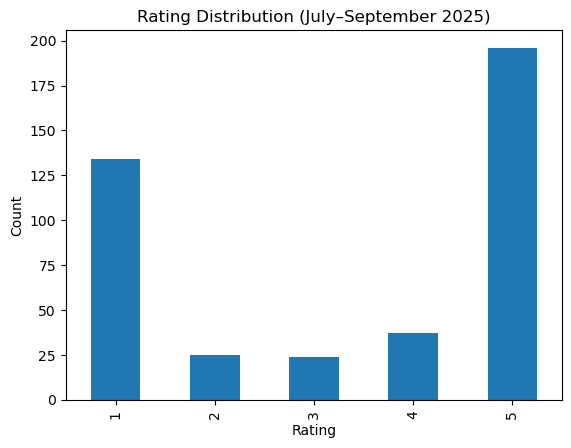

In [37]:
filtered_df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Rating Distribution (July–September 2025)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


### Total rating count by month

/tmp/ipykernel_6259/815722601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Month"] = filtered_df["Date"].dt.to_period("M")


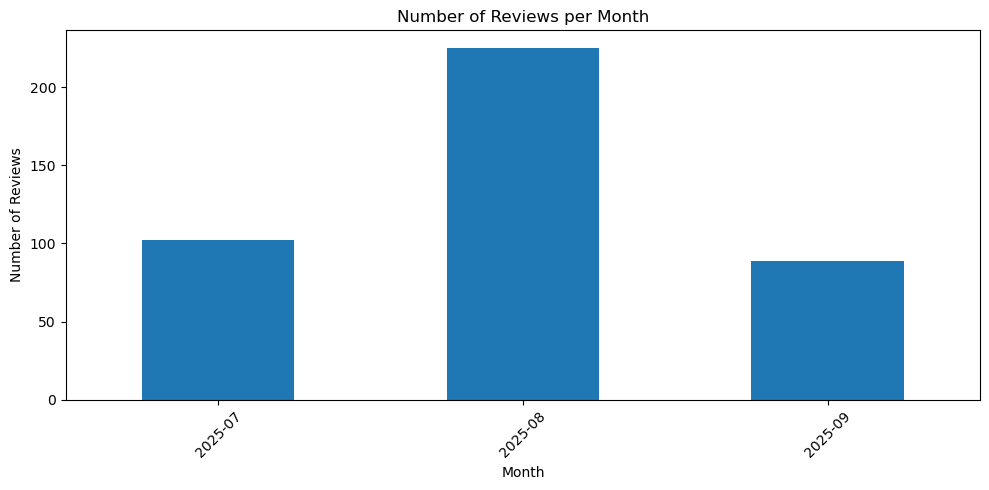

In [38]:
# Create a "Month" column (Year-Month format)
filtered_df["Month"] = filtered_df["Date"].dt.to_period("M")

reviews_per_month = filtered_df["Month"].value_counts().sort_index()

plt.figure(figsize=(10,5))
reviews_per_month.plot(kind="bar")
plt.title("Number of Reviews per Month")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Proportion of each rating per month

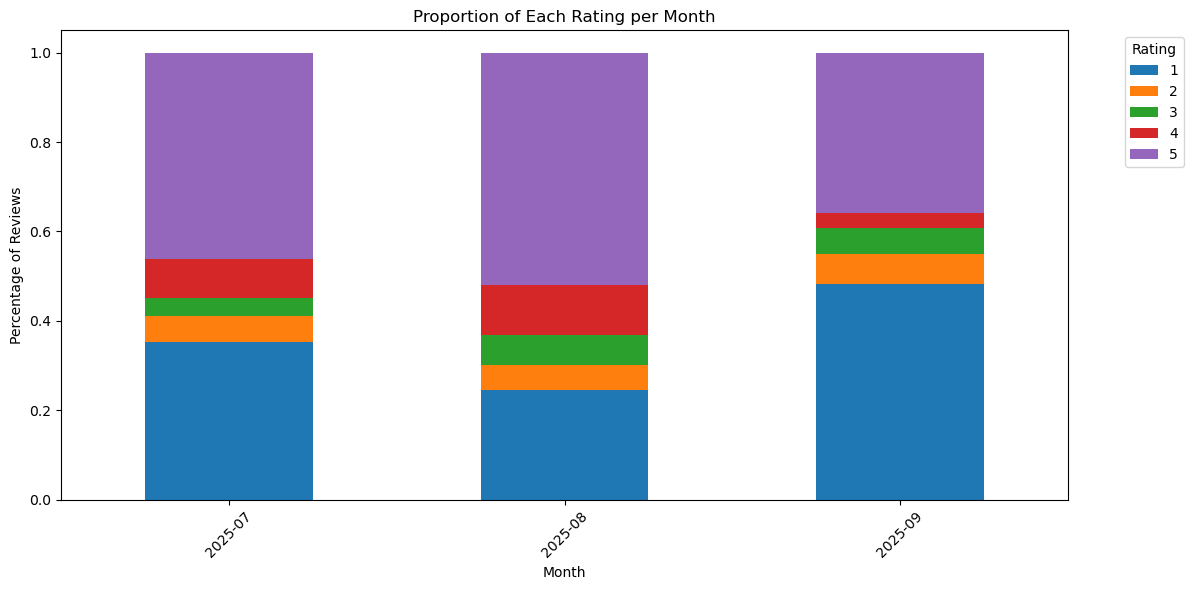

In [39]:
# Count reviews per rating per month
rating_by_month = filtered_df.groupby(["Month", "Rating"]).size().unstack(fill_value=0)

# print(rating_by_month.head())  # Optional: preview the data
rating_by_month_pct = rating_by_month.div(rating_by_month.sum(axis=1), axis=0)

rating_by_month_pct.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Proportion of Each Rating per Month")
plt.xlabel("Month")
plt.ylabel("Percentage of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Filter reviews for September 2025


In [ ]:
# Filter reviews for September 2025
september_df = df[(df["Date"].dt.year == 2025) & (df["Date"].dt.month == 9)]

# Filter bad reviews by rating
september_bad_df = september_df[september_df["Rating"] <= 2]

print(f"Total bad reviews in September 2025: {len(september_bad_df)}")
# print(september_bad_df[["Date", "Rating", "Review"]].head())


In [47]:
september_bad_df

,Rating,Review,Date,ThumbsUp,Month
1,1,This app get serious issues opening the app is...,2025-09-15 18:07:38,0,2025-09
2,1,more than a week now they refuse to fix device...,2025-09-15 17:41:12,0,2025-09
3,2,I've been using this app for a very long time ...,2025-09-15 17:02:45,0,2025-09
4,1,"Please what's wrong with your application, fac...",2025-09-15 12:06:47,1,2025-09
5,1,the first time I downloaded it it works great ...,2025-09-15 11:26:11,0,2025-09
6,1,I can't even rate this bank 1 star they restri...,2025-09-14 19:42:00,0,2025-09
7,1,I TRIED CHANGING MY PASSWORD CUS I FORGOT IT B...,2025-09-14 18:48:24,0,2025-09
8,1,"Not even working at all, worst bank app I've e...",2025-09-14 18:44:01,0,2025-09
9,1,my experience was terrible with the app. it ke...,2025-09-14 10:29:03,0,2025-09
11,1,really bad even my dund was locked i can't tra...,2025-09-13 19:58:30,0,2025-09


#### Clean reviews

In [48]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special chars/numbers
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text.strip()

september_bad_df["clean_review"] = september_bad_df["Review"].apply(clean_text)


/tmp/ipykernel_6259/3483151860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_bad_df["clean_review"] = september_bad_df["Review"].apply(clean_text)


In [62]:
# september_bad_df

### Get top 20  words

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine all reviews into a list
reviews = september_bad_df["clean_review"].dropna().tolist()

# Use CountVectorizer for fast tokenization and counting
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(reviews)

# Sum word counts across all reviews
word_counts = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

# Create a sorted list of (word, count)
sorted_counts = sorted(zip(words, word_counts), key=lambda x: x[1], reverse=True)

# Show top 20 words
for word, count in sorted_counts[:20]:
    print(f"{word}: {count}")


app: 29
bank: 16
money: 15
account: 13
just: 12
really: 11
keeps: 10
time: 9
alat: 8
bad: 6
crashing: 6
customer: 6
guys: 6
im: 6
issues: 6
login: 6
regret: 6
star: 6
terrible: 6
using: 6


### Top 20 phrases

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words="english", max_features=20)
X = vectorizer.fit_transform(september_bad_df["clean_review"])

phrases = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
phrase_counts = sorted(zip(phrases, counts), key=lambda x: x[1], reverse=True)

print("Top Complaints (Phrases):")
for phrase, count in phrase_counts:
    print(f"{phrase}: {count}")


Top Complaints (Phrases):
app keeps: 5
app keeps crashing: 4
customer service: 4
keeps crashing: 4
dont know: 3
face verification: 3
app opening: 2
bad bank: 2
crashing time: 2
keeps crashing time: 2
money just: 2
money time: 2
money time im: 2
really need: 2
reset security: 2
services longer: 2
time im: 2
transfer money: 2
wema bank: 2
worst bank: 2


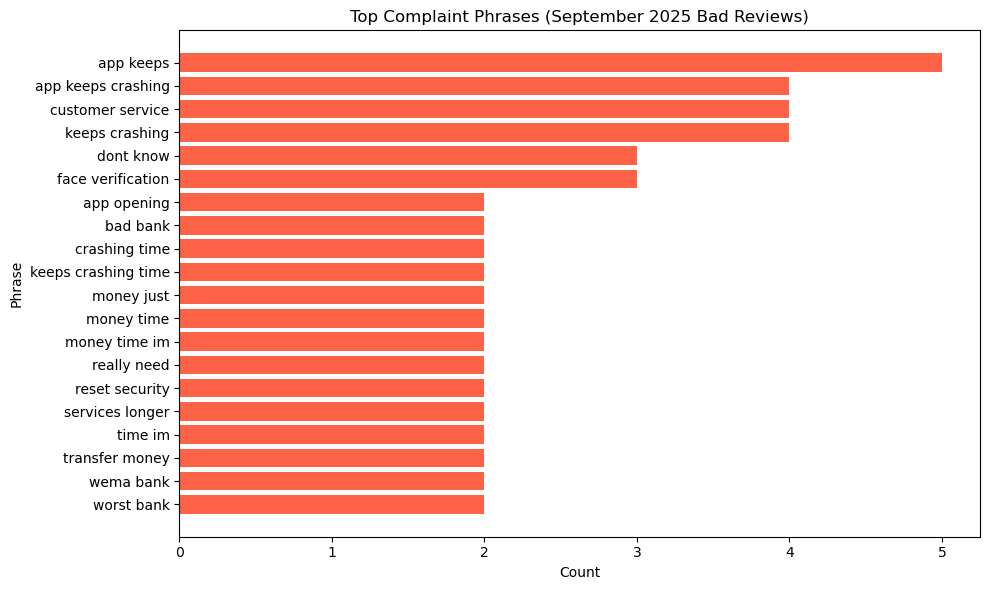

In [61]:
# Convert to DataFrame for easy plotting
phrase_df = pd.DataFrame(phrase_counts, columns=["Phrase", "Count"])

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(phrase_df["Phrase"], phrase_df["Count"], color="tomato")
plt.xlabel("Count")
plt.ylabel("Phrase")
plt.title("Top Complaint Phrases (September 2025 Bad Reviews)")
plt.gca().invert_yaxis()  # So the top phrase appears at the top
plt.tight_layout()
plt.show()

# 📊 Sentiment Analysis of ALAT App Reviews (September 2025)

## 📝 Overview
This analysis focuses on **bad reviews (1★–2★ ratings)** for the ALAT app by Wema Bank in **September 2025**.  
Our goal was to understand the **main causes of user dissatisfaction** using Natural Language Processing (NLP).

---

## 🔍 Methodology
1. **Data Collection:**  
   - Scraped 40k+ reviews from Google Play Store.
   - Filtered reviews to include only September 2025.
   - Selected reviews with **ratings ≤ 2** for "bad review" analysis.

2. **Text Preprocessing:**  
   - Converted text to lowercase.
   - Removed punctuation, numbers, and stopwords.
   - Applied tokenization and lemmatization.

3. **NLP Analysis:**  
   - Used **CountVectorizer** with `ngram_range=(2,3)` to extract common **phrases**.
   - Focused on **top 20 complaint phrases** by frequency.

---

## 📌 Key Findings (top 20 complaint phrases)

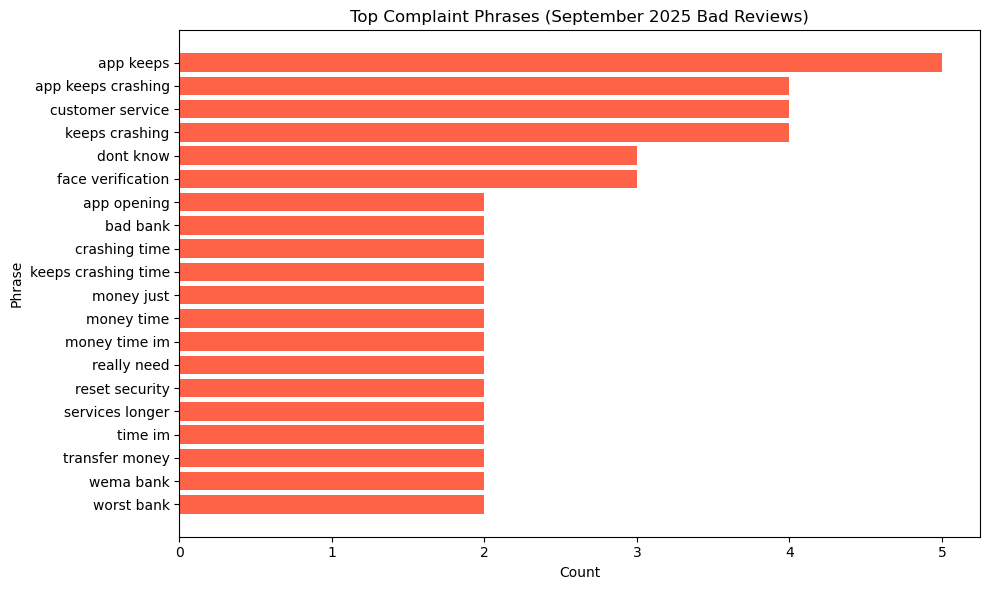
*(Horizontal bar chart of most frequent complaint phrases)*

---

## 💡 Insights
- **Crashes & Stability Issues:**  
  Phrases like *"app keeps crashing"*, *"keeps crashing"*, and *"crashing time"* indicate frequent app instability.

- **Poor Customer Support:**  
  *"customer service"* is a recurring complaint, suggesting users are dissatisfied with support responses.

- **Verification Problems:**  
  *"face verification"* issues imply frustration during login/verification process.

- **Money-Related Complaints:**  
  Multiple phrases (*"money just"*, *"transfer money"*) suggest problems with transactions, delays, or failures.

- **Brand Perception:**  
  Phrases like *"bad bank"* and *"worst bank"* reflect negative sentiment toward the brand overall.

---

## ✅ Conclusion
The majority of bad reviews in September 2025 revolve around **technical failures (app crashes)** and **transaction reliability**.  
Improving **app stability**, **reducing transaction failures**, and **enhancing customer support response times** would likely reduce negative feedback and improve overall app ratings.

---

## 🚀 Recommendations
- **Stability:** Deploy more robust crash analytics and prioritize fixing frequent crash patterns.
- **UX Improvements:** Streamline *face verification* process and provide clear troubleshooting instructions.
- **Customer Support:** Invest in faster, more empathetic responses to complaints.
- **Transaction Reliability:** Implement monitoring to detect and resolve failed transfers quickly.
